# Holt-Winters Methods

In [40]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Loading Dataset

In [41]:
df=pd.read_csv("airline-passengers.csv",index_col="Month",parse_dates=True)

In [42]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [43]:
df.index.freq

# Setting the Datetime Index

In [44]:
df.index.freq="MS"
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [45]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

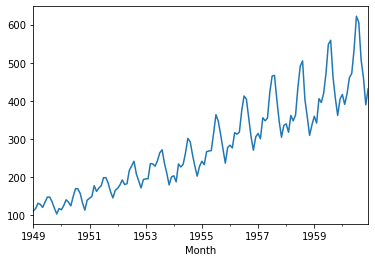

In [46]:
df["Passengers"].plot()

#trend seasonality present in data use holt winter method

# Simple Exponential Smoothing

In [47]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
alpha=0.15

In [48]:
model_ses12=SimpleExpSmoothing(df["Passengers"])
fitted_model=model_ses12.fit(smoothing_level=alpha,optimized=False)
fitted_model.fittedvalues

#optimized=false means we meanually specify the value of alpha, optimized=True meansmodel itself will choose the best value of alpha
# here 1st 2 values are same bcz optimized is false so shift the precision by -1

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    112.900000
1949-04-01    115.765000
1949-05-01    117.750250
                 ...    
1960-08-01    473.417458
1960-09-01    493.304839
1960-10-01    495.509113
1960-11-01    490.332746
1960-12-01    475.282834
Freq: MS, Length: 144, dtype: float64

In [49]:
df["SES12"]=fitted_model.fittedvalues.shift(-1)
df.head()
# so we can see simple exp does not handel trend and seasonality it have lots of error. as seen below.

,Passengers,SES12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.900000
1949-03-01,132,115.765000
1949-04-01,129,117.750250
1949-05-01,121,118.237712


# Double Exponential Smoothing

In [50]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

mod_add12=ExponentialSmoothing(df["Passengers"],trend="add")
fitted_model=mod_add12.fit()
df["DESadd12"]=fitted_model.fittedvalues.shift(-1)
df.head()

#double exp doing well as compare to simple exp

,Passengers,SES12,DESadd12
Month,,,
1949-01-01,112,112.000000,113.474833
1949-02-01,118,112.900000,119.464371
1949-03-01,132,115.765000,133.477565
1949-04-01,129,117.750250,130.543317
1949-05-01,121,118.237712,122.528131


<AxesSubplot:xlabel='Month'>

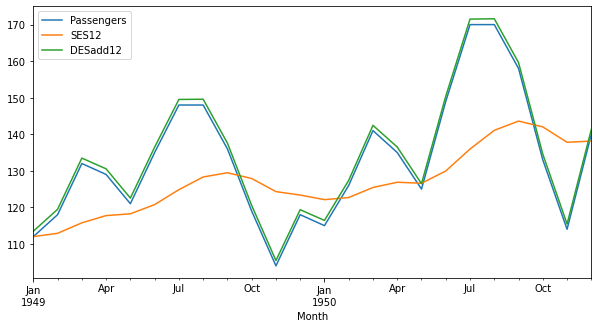

In [51]:
df[["Passengers","SES12","DESadd12"]].iloc[:24].plot(figsize=(10,5))

#form the plot we can see simpe exp smoothing does not understand anything but doble exp understand the pattern without seasonality

In [53]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

mod_mul12=ExponentialSmoothing(df["Passengers"],trend="mul")
fitted_model=mod_mul12.fit()
df["DESmul12"]=fitted_model.fittedvalues.shift(-1)
df.head()

,Passengers,SES12,DESadd12,DESmul12
Month,,,,
1949-01-01,112,112.000000,113.474833,110.808067
1949-02-01,118,112.900000,119.464371,116.951659
1949-03-01,132,115.765000,133.477565,131.195204
1949-04-01,129,117.750250,130.543317,128.229611
1949-05-01,121,118.237712,122.528131,120.138389


<AxesSubplot:xlabel='Month'>

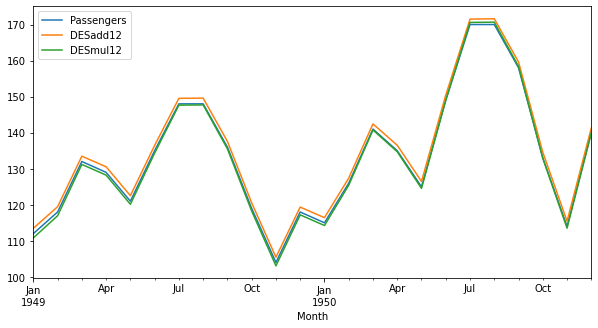

In [54]:
df[["Passengers","DESadd12","DESmul12"]].iloc[:24].plot(figsize=(10,5))
# here green line is exactly top on the blue line so the best suited model is multiplicative

# Triple exponential Smoothing

In [55]:
mod_add112=ExponentialSmoothing(df["Passengers"],trend="add",seasonal="add",seasonal_periods=12)
fitted_model=mod_add12.fit()
df["TESadd12"]=fitted_model.fittedvalues.shift(-1)
df.head()

,Passengers,SES12,DESadd12,DESmul12,TESadd12
Month,,,,,
1949-01-01,112,112.000000,113.474833,110.808067,113.474833
1949-02-01,118,112.900000,119.464371,116.951659,119.464371
1949-03-01,132,115.765000,133.477565,131.195204,133.477565
1949-04-01,129,117.750250,130.543317,128.229611,130.543317
1949-05-01,121,118.237712,122.528131,120.138389,122.528131


<AxesSubplot:xlabel='Month'>

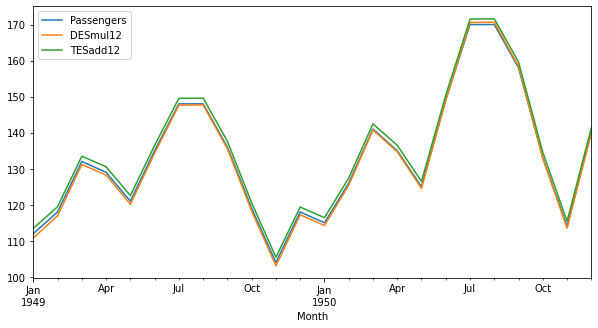

In [56]:
df[["Passengers","DESmul12","TESadd12"]].iloc[:24].plot(figsize=(10,5))

In [57]:
mod_mul112=ExponentialSmoothing(df["Passengers"],trend="add",seasonal="add",seasonal_periods=12)
fitted_model=mod_mul112.fit()
df["TESmul12"]=fitted_model.fittedvalues.shift(-1)
df.head()

,Passengers,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Month,,,,,,
1949-01-01,112,112.000000,113.474833,110.808067,113.474833,120.186378
1949-02-01,118,112.900000,119.464371,116.951659,119.464371,134.715408
1949-03-01,132,115.765000,133.477565,131.195204,133.477565,131.402147
1949-04-01,129,117.750250,130.543317,128.229611,130.543317,124.668229
1949-05-01,121,118.237712,122.528131,120.138389,122.528131,140.462142


<AxesSubplot:xlabel='Month'>

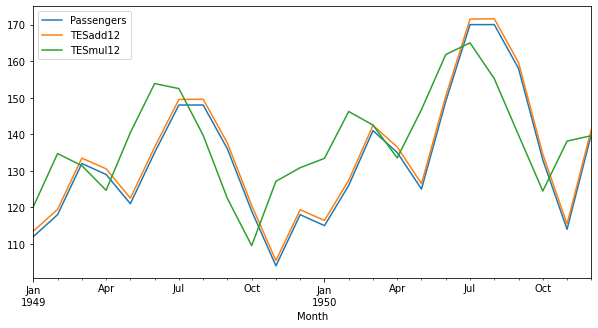

In [60]:
df[["Passengers","TESadd12","TESmul12"]].iloc[:24].plot(figsize=(10,5))